In [25]:
import os

os.listdir("/kaggle/input")


['plantdisease']

In [2]:
os.listdir("/kaggle/input/plantdisease/PlantVillage")

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [3]:
import os
import pandas as pd

base_path = "/kaggle/input/plantdisease/PlantVillage"

# taking tomato classes
tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

data = []
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    data.append([cls, len(os.listdir(cls_path))])

df = pd.DataFrame(data, columns=["Class", "Number of Images"])
df

,Class,Number of Images
0,Tomato_Leaf_Mold,952
1,Tomato__Tomato_YellowLeaf__Curl_Virus,3209
2,Tomato_Bacterial_spot,2127
3,Tomato_Septoria_leaf_spot,1771
4,Tomato_healthy,1591
5,Tomato_Spider_mites_Two_spotted_spider_mite,1676
6,Tomato_Early_blight,1000
7,Tomato__Target_Spot,1404
8,Tomato_Late_blight,1909
9,Tomato__Tomato_mosaic_virus,373


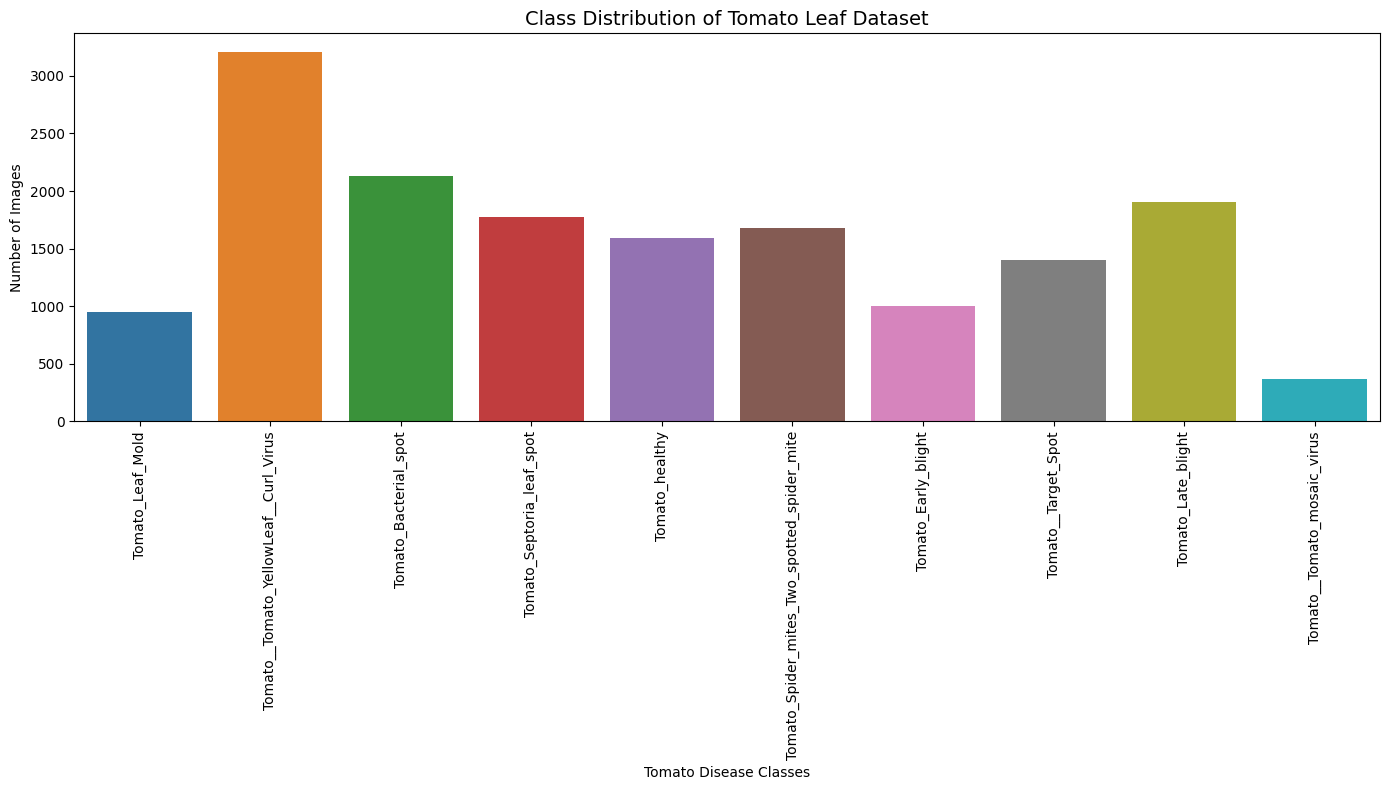

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))

sns.barplot(
    data=df,
    x="Class",
    y="Number of Images",
    hue="Class",                 
    palette="tab10",
    legend=False                 
)

plt.xticks(rotation=90)
plt.title("Class Distribution of Tomato Leaf Dataset", fontsize=14)
plt.xlabel("Tomato Disease Classes")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


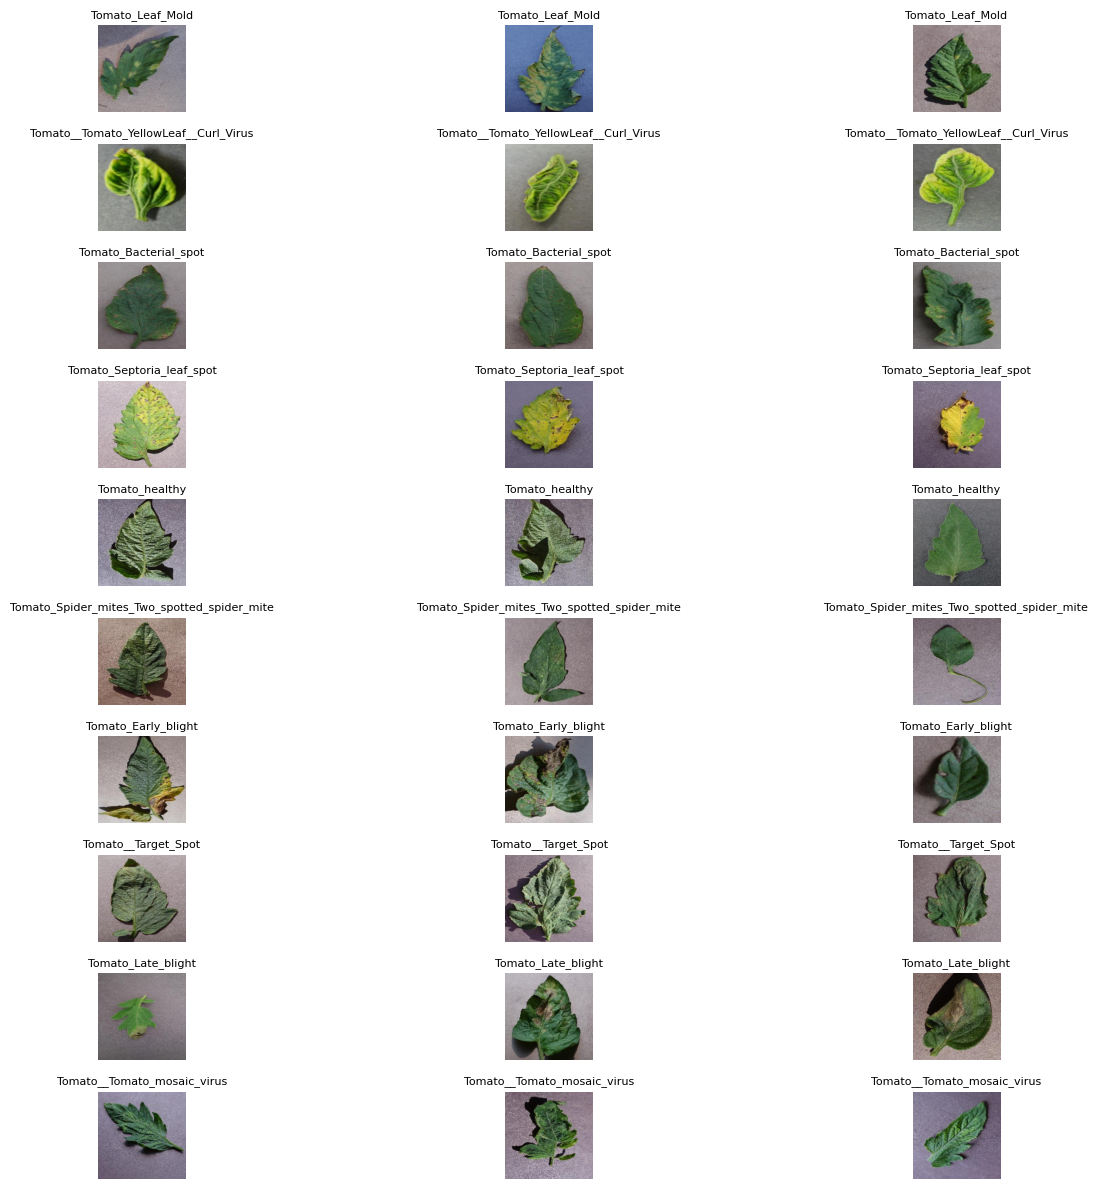

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

base_path = "/kaggle/input/plantdisease/PlantVillage"

tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

plt.figure(figsize=(15,12))

img_index = 1
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    images = os.listdir(cls_path)
    
    # we randomly select 3 images per class
    sample_images = random.sample(images, 3)
    
    for img_name in sample_images:
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        
        plt.subplot(len(tomato_classes), 3, img_index)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls, fontsize=8)
        img_index += 1

plt.tight_layout()
plt.show()

In [14]:
import os
from PIL import Image
import pandas as pd
import random

base_path = "/kaggle/input/plantdisease/PlantVillage"
tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

sizes = []

# some sample images 
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    images = random.sample(os.listdir(cls_path), 50)
    
    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        sizes.append(img.size)  # (width, height)

df_sizes = pd.DataFrame(sizes, columns=["Width", "Height"])
df_sizes.head()


,Width,Height
0,256,256
1,256,256
2,256,256
3,256,256
4,256,256


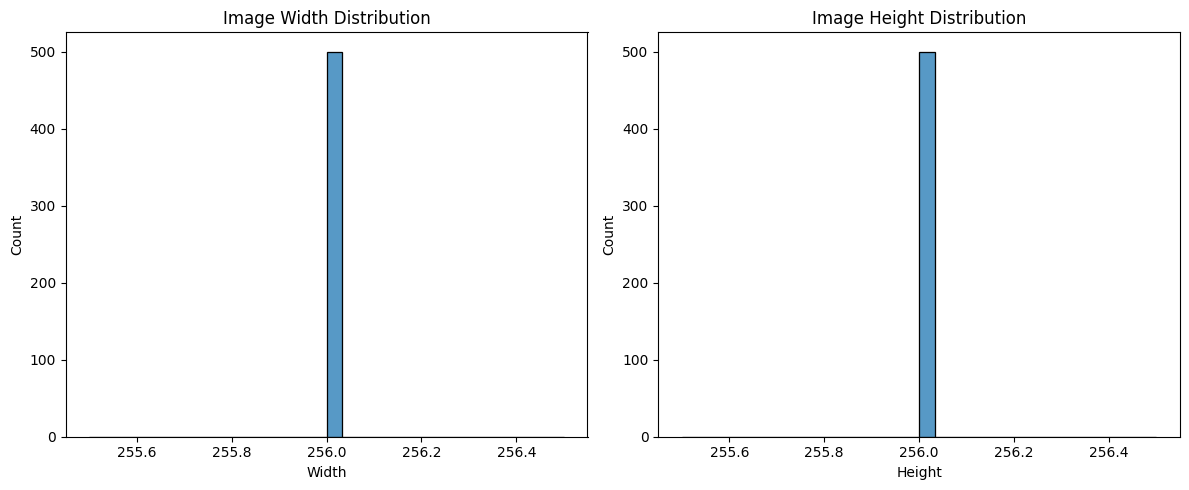

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_sizes["Width"], bins=30)
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
sns.histplot(df_sizes["Height"], bins=30)
plt.title("Image Height Distribution")

plt.tight_layout()
plt.show()

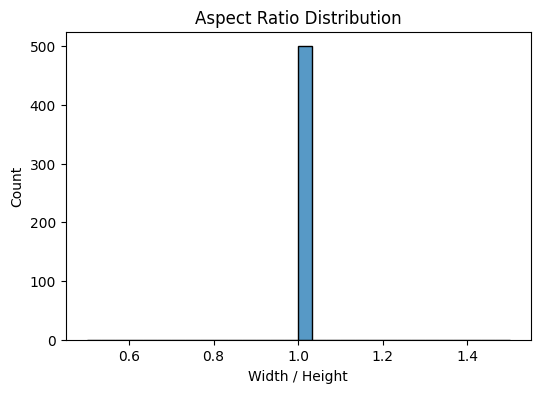

In [13]:
df_sizes["Aspect_Ratio"] = df_sizes["Width"] / df_sizes["Height"]

plt.figure(figsize=(6,4))
sns.histplot(df_sizes["Aspect_Ratio"], bins=30)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.show()

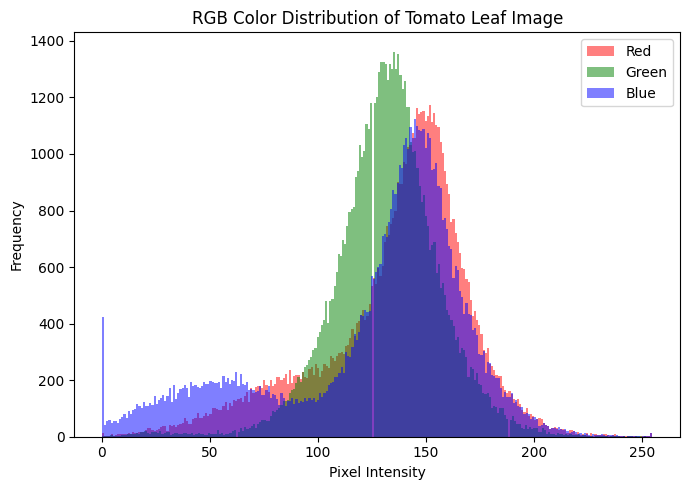

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(img_path).convert("RGB")
img_np = np.array(img)

plt.figure(figsize=(7,5))
plt.hist(img_np[:,:,0].ravel(), bins=256, alpha=0.5, label="Red", color="red")
plt.hist(img_np[:,:,1].ravel(), bins=256, alpha=0.5, label="Green", color="green")
plt.hist(img_np[:,:,2].ravel(), bins=256, alpha=0.5, label="Blue", color="blue")

plt.legend()
plt.title("RGB Color Distribution of Tomato Leaf Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


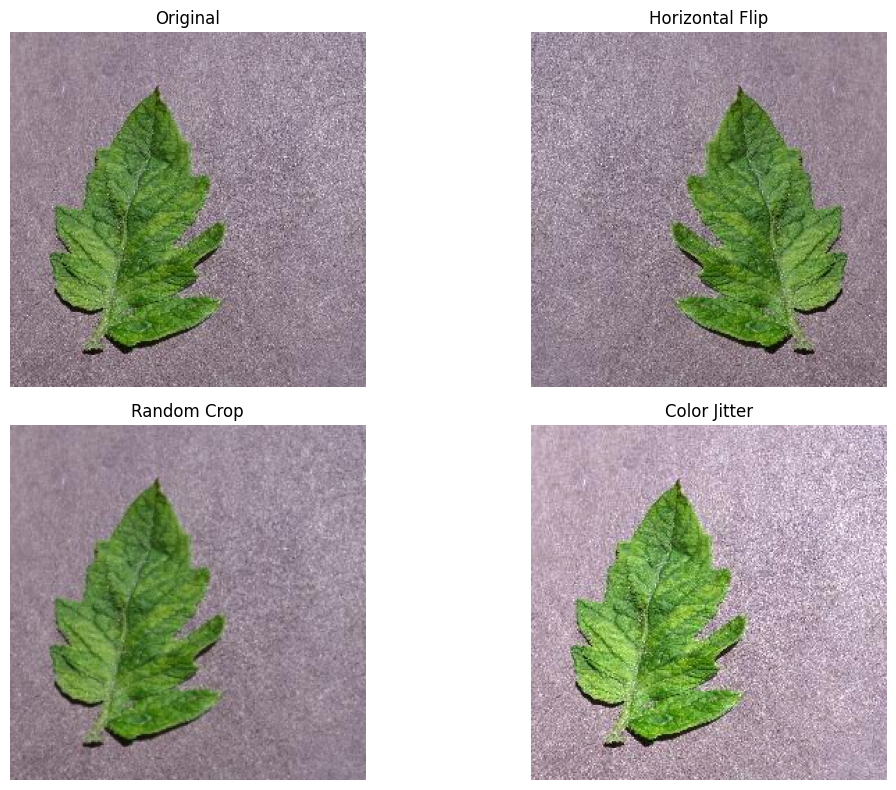

In [22]:
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Load one sample image
img = Image.open(img_path).convert("RGB")

# Define augmentations
augmentations = {
    "Original": transforms.ToTensor(),
    "Horizontal Flip": transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor()
    ]),
    "Random Crop": transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ToTensor()
    ]),
    "Color Jitter": transforms.Compose([
        transforms.ColorJitter(brightness=0.4, contrast=0.4),
        transforms.ToTensor()
    ])
}

# Plot results
plt.figure(figsize=(12,8))
for i, (title, aug) in enumerate(augmentations.items()):
    augmented_img = aug(img).permute(1,2,0)
    plt.subplot(2,2,i+1)
    plt.imshow(augmented_img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()
